# Netflix Stock Data Analysis by Jailendra Meena 23113073  
## Plan for the Analysis  
1. Set up the environment  
2. Load the dataset  
3. Data exploration & cleaning  
4. Univariate Analysis  
5. Multivariate Analysis  
6. Statistical Measures  
7. Visualizations (heatmaps, bar plots, scatter plots)  
8. Conclusions  


In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('ggplot')
sns.set_palette('viridis')


In [2]:
# loading Dataset
df = pd.read_csv('NFLX_2002-05-23_2025-01-31.csv')
df.head()


Date      Open      High       Low     Close  Adj Close     Volume
0  2002-05-23  1.156429  1.242857  1.145714  1.196429   1.196429  104790000
1  2002-05-24  1.214286  1.225000  1.197143  1.210000   1.210000   11104800
2  2002-05-28  1.213571  1.232143  1.157143  1.157143   1.157143    6609400
3  2002-05-29  1.164286  1.164286  1.085714  1.103571   1.103571    6757800
4  2002-05-30  1.107857  1.107857  1.071429  1.071429   1.071429   10154200

In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [4]:
#cleaning of data
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5710 entries, 0 to 5709
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       5710 non-null   object 
 1   open       5710 non-null   float64
 2   high       5710 non-null   float64
 3   low        5710 non-null   float64
 4   close      5710 non-null   float64
 5   adj_close  5710 non-null   float64
 6   volume     5710 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 312.4+ KB


open         high          low        close    adj_close  \
count  5710.000000  5710.000000  5710.000000  5710.000000  5710.000000   
mean    158.724558   161.062392   156.335581   158.756151   158.756151   
std     208.336043   211.079642   205.499460   208.330538   208.330538   
min       0.377857     0.410714     0.346429     0.372857     0.372857   
25%       4.251786     4.343928     4.168214     4.255000     4.255000   
50%      43.982857    44.496429    42.891428    43.815001    43.815001   
75%     306.294998   311.722504   300.932503   305.962494   305.962494   
max     998.030029   999.000000   970.010010   984.859985   984.859985   

             volume  
count  5.710000e+03  
mean   1.532551e+07  
std    1.846796e+07  
min    2.856000e+05  
25%    5.487625e+06  
50%    9.547800e+06  
75%    1.823562e+07  
max    3.234140e+08

C:\Users\sures\miniconda3\envs\ds_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


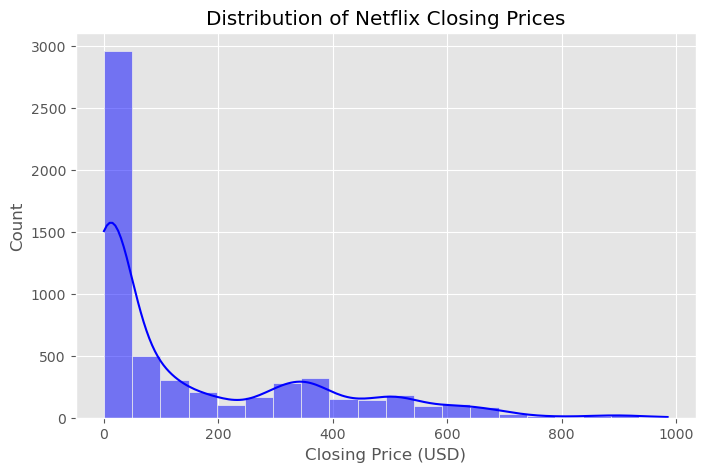

In [5]:
#Univariate Analysis
# Distribution of Closing Prices
plt.figure(figsize=(8, 5))
sns.histplot(df['close'], bins=20, kde=True, color='blue')
plt.title('Distribution of Netflix Closing Prices')
plt.xlabel('Closing Price (USD)')
plt.show()


C:\Users\sures\miniconda3\envs\ds_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


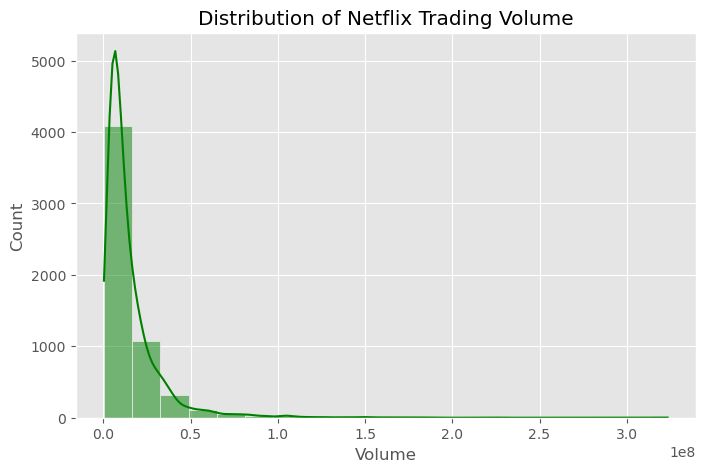

In [6]:
# Distribution of Trading Volume
plt.figure(figsize=(8, 5))
sns.histplot(df['volume'], bins=20, kde=True, color='green')
plt.title('Distribution of Netflix Trading Volume')
plt.xlabel('Volume')
plt.show()


C:\Users\sures\miniconda3\envs\ds_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


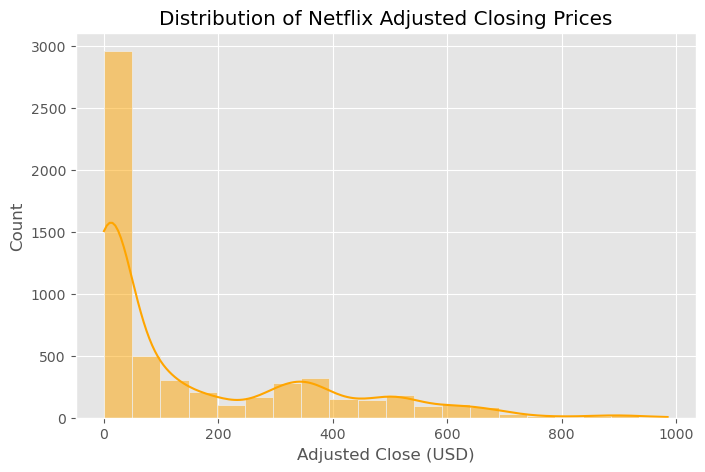

In [7]:
# Distribution of Adjusted Closing Prices
plt.figure(figsize=(8, 5))
sns.histplot(df['adj_close'], bins=20, kde=True, color='orange')
plt.title('Distribution of Netflix Adjusted Closing Prices')
plt.xlabel('Adjusted Close (USD)')
plt.show()


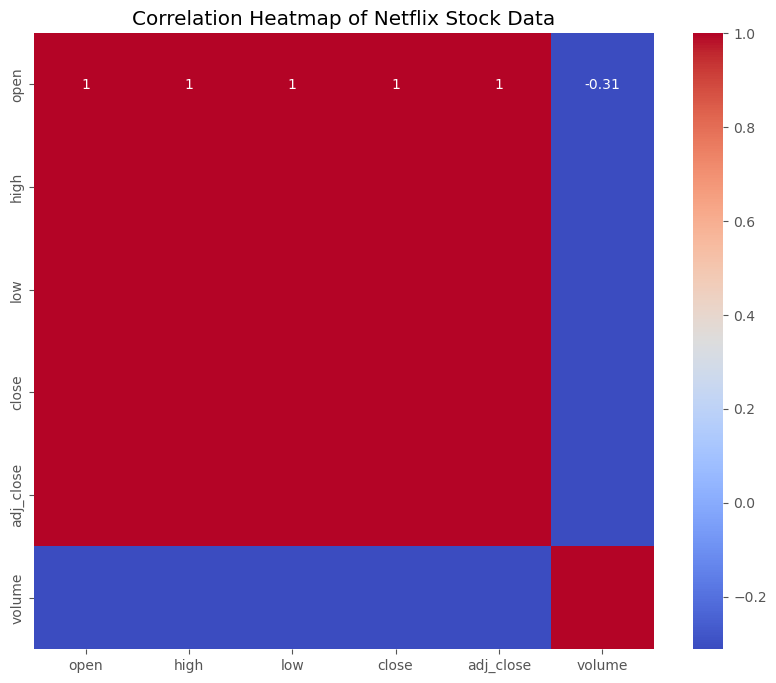

In [8]:
#Multivariate Analysis 
numerical_df = df.select_dtypes(include='number')

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Netflix Stock Data')
plt.show()


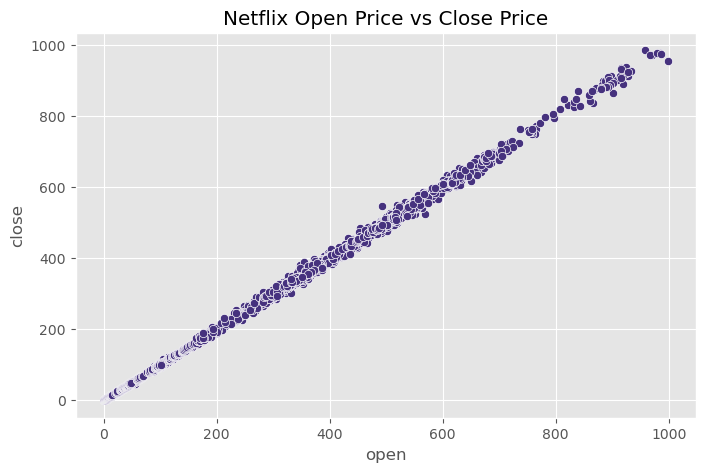

In [9]:
# Open Price vs Close Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x='open', y='close', data=df)
plt.title('Netflix Open Price vs Close Price')
plt.show()


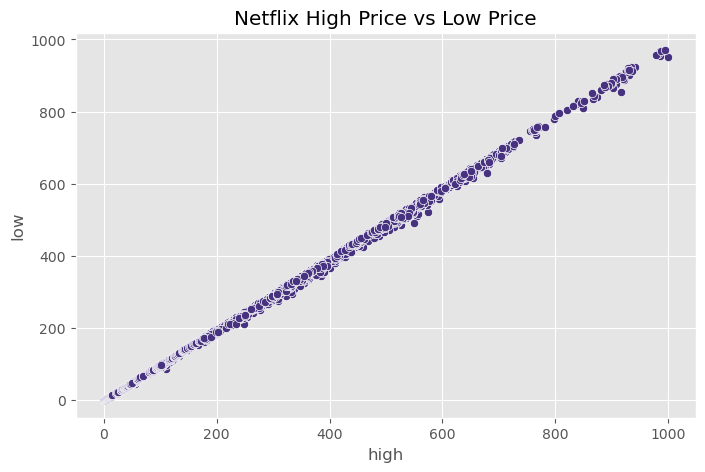

In [10]:
# High Price vs Low Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x='high', y='low', data=df)
plt.title('Netflix High Price vs Low Price')
plt.show()


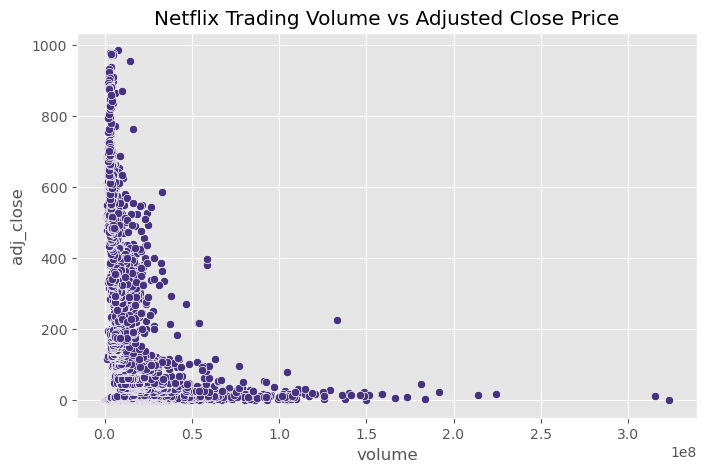

In [11]:
# Volume vs Adjusted Close Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x='volume', y='adj_close', data=df)
plt.title('Netflix Trading Volume vs Adjusted Close Price')
plt.show()


In [12]:
#. Statistical Measures 
close_mean = df['close'].mean()
close_median = df['close'].median()
close_mode = df['close'].mode()[0]

print(f"Mean Closing Price: {close_mean} USD")
print(f"Median Closing Price: {close_median} USD")
print(f"Mode Closing Price: {close_mode} USD")



Mean Closing Price: 158.7561505062672 USD
Median Closing Price: 43.81500053405762 USD
Mode Closing Price: 1.6071430444717407 USD


In [13]:
volume_mean = df['volume'].mean()
volume_median = df['volume'].median()
volume_mode = df['volume'].mode()[0]

print(f"Mean Trading Volume: {volume_mean}")
print(f"Median Trading Volume: {volume_median}")
print(f"Mode Trading Volume: {volume_mode}")


Mean Trading Volume: 15325512.942206655
Median Trading Volume: 9547800.0
Mode Trading Volume: 5513200


In [14]:
# Interactive Line Chart of Netflix Closing Prices Over Time
fig = px.line(df, x='date', y='close', title='Netflix Closing Prices Over Time')
fig.show()


In [15]:
# Interactive Scatter Plot: Volume vs Closing Price
fig = px.scatter(df, x='volume', y='close', color='close', title='Trading Volume vs Closing Price')
fig.show()


C:\Users\sures\miniconda3\envs\ds_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\sures\miniconda3\envs\ds_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\sures\miniconda3\envs\ds_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\sures\miniconda3\envs\ds_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\sures\miniconda3\envs\ds_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarn

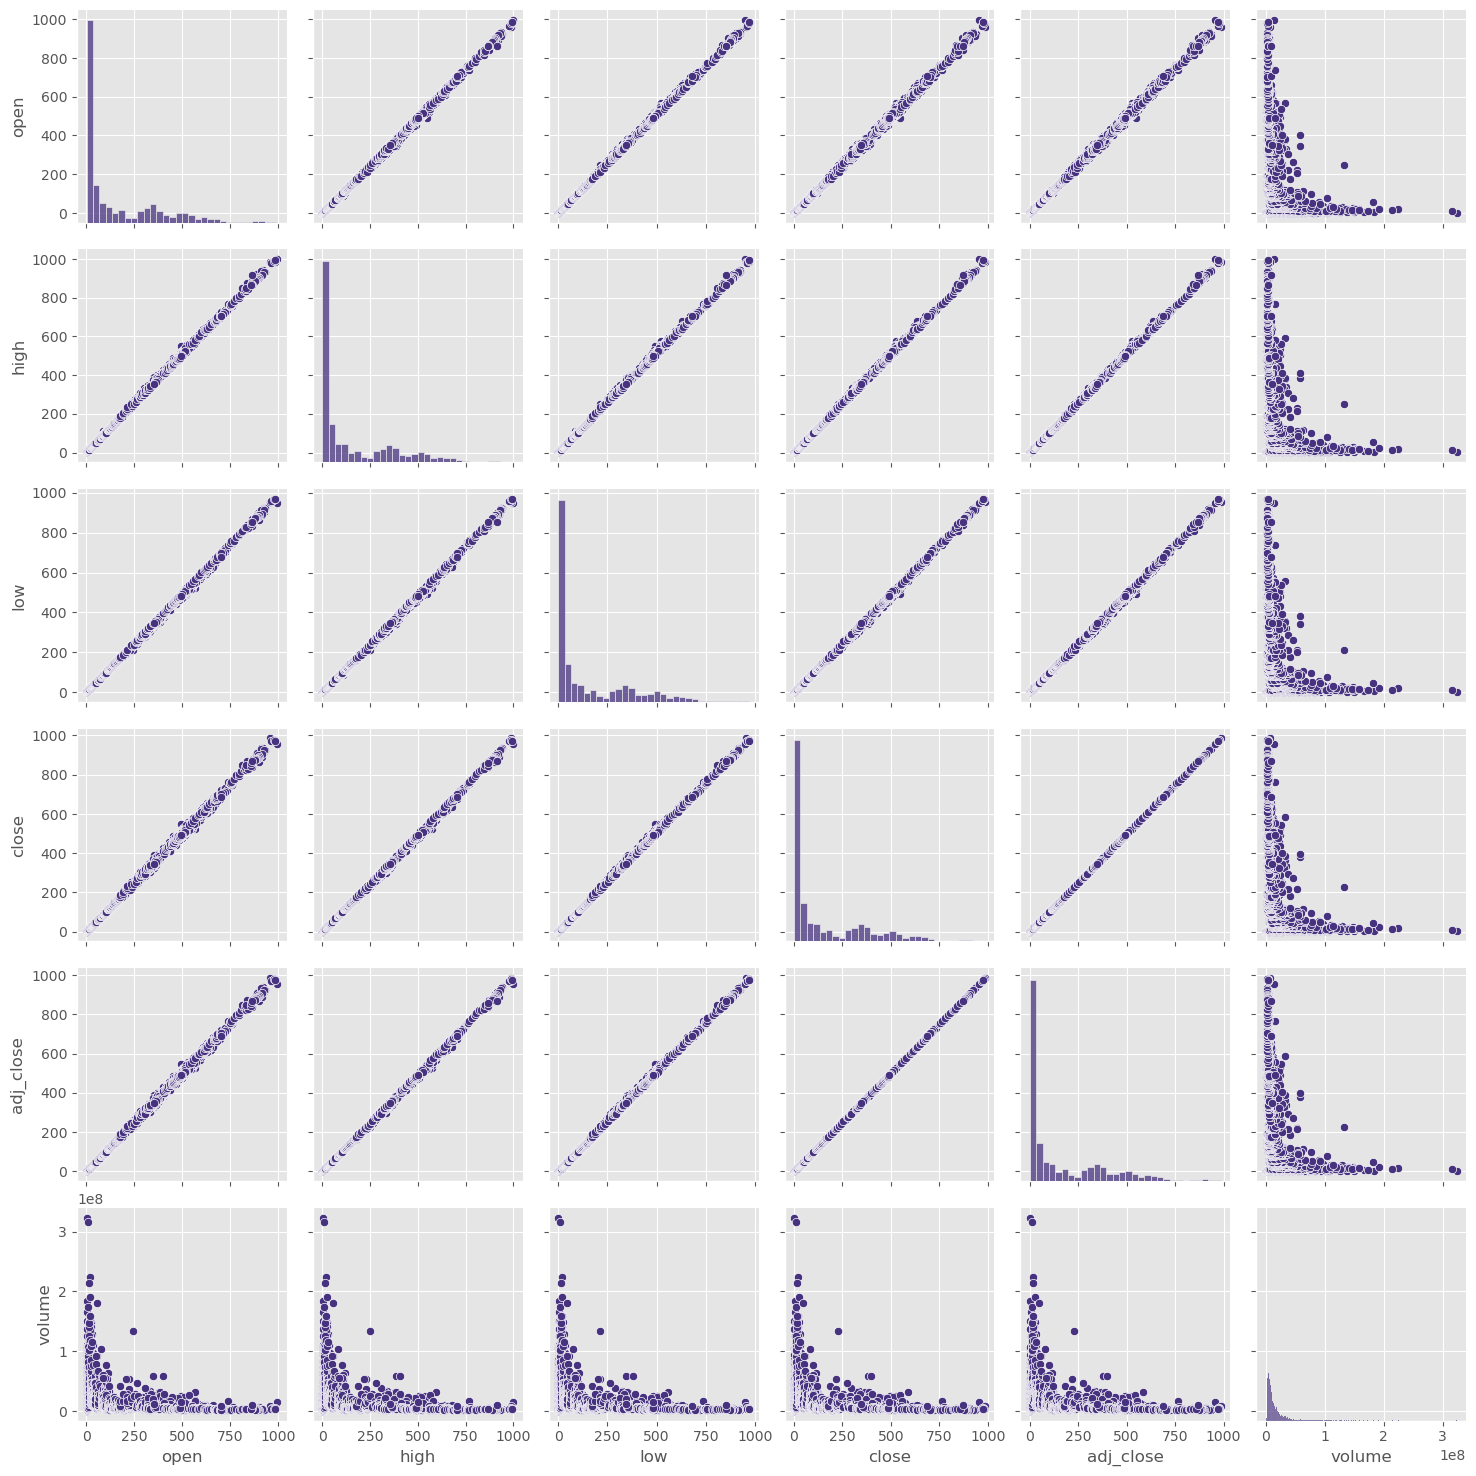

In [16]:
# Pair Plot
sns.pairplot(numerical_df)
plt.show()


## 8. Conclusions  
- Netflix stock prices have shown significant growth over time, with notable periods of volatility.  
- There’s a strong correlation between high and low prices, indicating consistent daily price ranges.  
- Trading volume spikes often align with price movement — likely tied to major announcements or earnings.  
- Adjusted closing prices closely follow standard closing prices with minor adjustments for dividends or splits.  
